# Piecewise Linear Regression

![piecewiseLinearRegression](./figs/regression1.png)


## Motivation

 Relationships that can be explained by linear regression are limited in practice. Polynomial or other complex machine learning models are hard to explain, and could behave extreme outside of the data range. Piecewise linear regression, with flexible number of segments and break points may work when linear regression is too simple but patches of linear regression could express the phases of the relationship.

Some examples of piecewise linear regression applications are linked below:

- [A Tutorial on the Piecewise Regression Approach Applied to Bedload Transport Data](https://www.fs.fed.us/rm/pubs/rmrs_gtr189.pdf)
- [Water-cement ration v.s. compressive strength](https://onlinecourses.science.psu.edu/stat501/node/310/)
- [Piecewise Linear Regression: A Statistical Method for the Analysis of the Relationship between Traffic Signal Parameters and Air Pollutant Emissions](http://atrf.info/papers/2016/files/ATRF2016_Full_papers_resubmission_64.pdf)

## Previous works

[1] [A Tutorial on the Piecewise Regression Approach Applied to Bedload Transport Data](https://www.fs.fed.us/rm/pubs/rmrs_gtr189.pdf)
- Break point estimates need to be provided by user
- Use of SAS NLIN, Nonlinear least squares regression

[2] [segmented: An R Package to Fit Regression Models with Broken-Line Relationships](https://www.researchgate.net/publication/234092680_Segmented_An_R_Package_to_Fit_Regression_Models_With_Broken-Line_Relationships)

- Break point estimates need to be provided by user
- Iterative linear regression

[3] [A Learning Algorithm for Piecewise Linear Regression](https://pdfs.semanticscholar.org/7345/d357145bc19701397cb894d22e28f770513e.pdf)

- Clustering and regression. Multi-variables. The line may be disconnected.
- Separate gate for each hidden node.


##  Proposed method - Neural network application

### Developping an intuition

Can you imagine adding up following functions ($h_1+h_2+h_3$)?

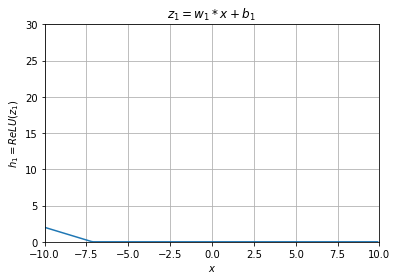

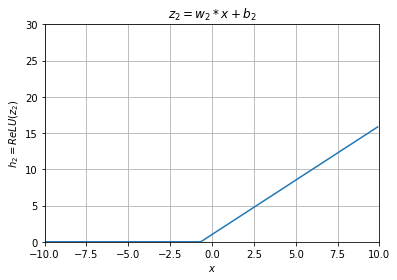

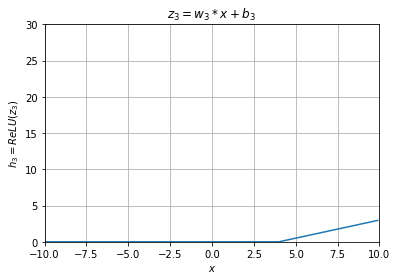

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def ReLU(x):
    y = np.maximum(0, x)
    return y

def plothi(w,b,i):
    x = np.arange(-10, 10, 0.1)
    z = w*x+b
    h = ReLU(z)
    plt.plot(x,h)
    plt.xlim(-10, 10)
    plt.ylim(0, 30)
    plt.xlabel('$x$')
    plt.ylabel('$h_{}=ReLU(z_{})$'.format(i,i))
    plt.title('$z_{}=w_{}*x+b_{}$'.format(i,i,i))
    plt.grid()
    plt.show()

# hidden note 1 output
i = 1 
b = -5
w = -0.7
plothi(w,b,i)

# hidden note 2 output
i = 2
b = 1
w = 1.5
plothi(w,b,i)

# hidden note 3 output
i = 3
b = -2
w = 0.5
plothi(w,b,i)

Answer:

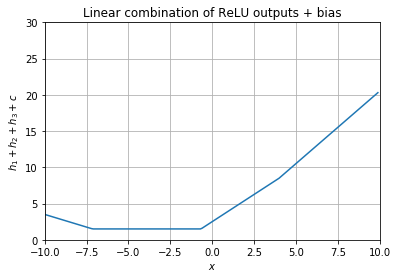

In [53]:
b = -5
w = -0.7
h1 = ReLU(w*x+b)

b = 1
w = 1.5
h2 = ReLU(w*x+b)

b = -2
w = 0.5
h3 = ReLU(w*x+b)

c = 1.5

plt.plot(x,h1+h2+h3+c)
plt.xlim(-10, 10)
plt.ylim(0, 30)
plt.xlabel('$x$')
plt.ylabel('$h_1+h_2+h_3+c$')
plt.title('Linear combination of ReLU outputs + bias')
plt.grid()
plt.show()


Linear combination of ReLU outputs + bias becomes connected lines.
In multi-dimention $x=(x_1,x_2,..)$, it becomes connected hyperplane.


### Graphical explanation

![feedforward](./figs/feedforward.png)

 Let me use the diagram above to explain the idea. This is 2 variables ($x_1$, $x_2$) example, but you can increase number of variables. 
 The first layer represents independent variables, or input layers. The bottom node is constant 1 and is expressing bias with edges to the hidden layers.
 
 The 2nd layer is hidden layer, and in this case we have 3 nodes $h_1$, $h_2$, and $h_3$. This is equal to the number of potential segments-1. In this case above, we designed to create 4 segments at most. Input to the $h_1$ is $w_{11}*x_1+w_{21}*x_2+b_1$. Output of hidden node is the result of ReLU activation. The output layer node $y$ is just some of hidden layer outputs plus bias $c$.
 
  The error between $y$ and actual observation $\bar{y}$ will create a loss function and we optimize $W$ , $b$ and $c$ to reduce the loss. We also apply L1 regularization on weights to regulate the number of segments. L1 regularization tends to force weights to 0 if the corresponding variable does not have much impact.
  
 The benefit of this neural network optimization method is that we can avoid the manual input like initial breakpoints estimate or number of segment, and let the data decide. In comparison with [3], it is quite similar idea, but this model is much simple. The gate mentioned in the [3] corresponds to ReLU with no separate parameters here, and there's no clustering etc. It's just summing up output of ReLU.

### Methematical explanation

 For those prefer mathematical explanation, here's the formula:

$$
y = (1,...,1) (W^Tx+b)^+ +c
$$

Here, $y$ is a dependent variable. $x$ is independent variables. It is a column vector with different variables in row direction. $W$ contains slopes of different input variables in the row direction and the hidden nodes in the column direction. The result of $W^Tx$ places hidden nodes in row direction. The bias $b$ is a column vector with a bias for each hidden nodes in row direction. Let me provide more concrete example. The $i$th row of $W^Tx+b$ is an input to a hidden node $h_i$, say $z_i$. The $z_i$ for 2 variables input $x = [x_1, x_2]^T$ can be written as 
$$
z_i = \begin{bmatrix}
w_{1i}\\ 
w_{2i}
\end{bmatrix}^T  \begin{bmatrix}
x_1\\ 
x_2
\end{bmatrix} + b_i = w_{1i}*x_1+w_{2i}*x_2+b_i
$$
Here, $w_{1i}$ and $w_{2i}$ are slopes for $x_1$ and $x_2$ in segment $i$ respectively. $b_i$ is a bias. 

The $(.)^+$ represent ReLU  or $max\{0, . \} $.  Finally, applying (1,...,1) just means adding up all the rows, in other words, the outputs of all the hidden nodes plus bias $c$.

By adding 1 on the last row on $x$,  and adding $b$ on the last row on $W$, the formula can be written as
$$
y = (1,...,1) (W^Tx)^+ +c
$$




## Getting data

Get sample data from [here](https://www.fs.usda.gov/rds/archive/Product/RDS-2007-0004). Download the zip file, and extract on the working directory. You should have ./RDS-2007-0004.


## Import sample data

In [67]:
"""
import sample data
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#data = pd.read_csv("RDS-2007-0004\Data\HAYDEN_bedloadtransport.csv",skiprows=7)
data = pd.read_csv("RDS-2007-0004\Data\LTLGRAN_bedloadtransport.csv",skiprows=7)
data.head()

,Date,Year,X,Y
0,05/08/85,1985,3.936450,0.049770
1,05/15/85,1985,2.945258,0.009324
2,05/25/85,1985,3.653253,0.016485
3,05/30/85,1985,2.831979,0.013104
4,06/05/85,1985,1.925746,0.003601


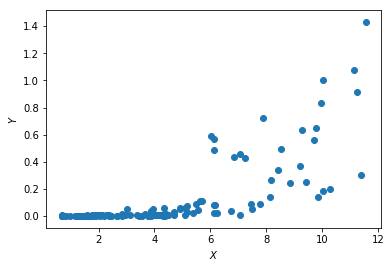

In [73]:
plt.scatter(data['X'],data['Y'])
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.show()

Now the model implementation

------------------Epoch 0/500 ------------------
loss = 0.029794637113809586
------------------Epoch 1/500 ------------------
loss = 0.02844361774623394
------------------Epoch 2/500 ------------------
loss = 0.027806470170617104
------------------Epoch 3/500 ------------------
loss = 0.027747835963964462
------------------Epoch 4/500 ------------------
loss = 0.02796814776957035
------------------Epoch 5/500 ------------------
loss = 0.02815474569797516
------------------Epoch 6/500 ------------------
loss = 0.028162864968180656
------------------Epoch 7/500 ------------------
loss = 0.02801269106566906
------------------Epoch 8/500 ------------------
loss = 0.02779175154864788
------------------Epoch 9/500 ------------------
loss = 0.027587128803133965
------------------Epoch 10/500 ------------------
loss = 0.0274561308324337
------------------Epoch 11/500 ------------------
loss = 0.0274132639169693
------------------Epoch 12/500 ------------------
loss = 0.027431877329945564
-----

loss = 0.02358088828623295
------------------Epoch 193/500 ------------------
loss = 0.023578284308314323
------------------Epoch 194/500 ------------------
loss = 0.0235756766051054
------------------Epoch 195/500 ------------------
loss = 0.02357310615479946
------------------Epoch 196/500 ------------------
loss = 0.023570572957396507
------------------Epoch 197/500 ------------------
loss = 0.02356807328760624
------------------Epoch 198/500 ------------------
loss = 0.02356558106839657
------------------Epoch 199/500 ------------------
loss = 0.02356310933828354
------------------Epoch 200/500 ------------------
loss = 0.023560678586363792
------------------Epoch 201/500 ------------------
loss = 0.023558298125863075
------------------Epoch 202/500 ------------------
loss = 0.023555969819426537
------------------Epoch 203/500 ------------------
loss = 0.023553691804409027
------------------Epoch 204/500 ------------------
loss = 0.0235514547675848
------------------Epoch 205/500 -

loss = 0.023441411554813385
------------------Epoch 387/500 ------------------
loss = 0.023441359400749207
------------------Epoch 388/500 ------------------
loss = 0.023441310971975327
------------------Epoch 389/500 ------------------
loss = 0.02344123274087906
------------------Epoch 390/500 ------------------
loss = 0.02344118058681488
------------------Epoch 391/500 ------------------
loss = 0.023441132158041
------------------Epoch 392/500 ------------------
loss = 0.023441076278686523
------------------Epoch 393/500 ------------------
loss = 0.023441016674041748
------------------Epoch 394/500 ------------------
loss = 0.023440968245267868
------------------Epoch 395/500 ------------------
loss = 0.02344091422855854
------------------Epoch 396/500 ------------------
loss = 0.02344086393713951
------------------Epoch 397/500 ------------------
loss = 0.02344084531068802
------------------Epoch 398/500 ------------------
loss = 0.023440806195139885
------------------Epoch 399/500 

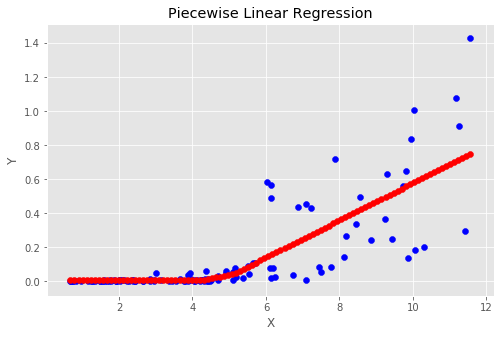

In [76]:
import tensorflow as tf
from sklearn import linear_model

"""
parameters
"""
sample_rate = 1.0 # rondom sampling rate for each batch. 
#It does not have much capacity and probably not much worry about overfitting. 1.0 should be fine.
epoc = 500
input_dim = 1 # number of input dimention(variables)
h1_dim = 3 # potential number of segments-1
lamda = 0.0001 # L1 reglurarization
lr=0.001 #learning rate

plt.style.use('ggplot')

"""
import sample data
"""
X = np.array(data.X).reshape(-1,input_dim)
Y = np.array(data.Y).reshape(-1,1)


"""
Util functions
"""
# next batch from stack overflow
def next_batch(rate, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[: int(len(data)*rate)]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

"""
helping search with a good initial values
"""
lreg = linear_model.LinearRegression()
lreg.fit(X, Y)

"""
tensorflow graph
"""
# reset graph
tf.reset_default_graph()

# Placeholders for input data and the targets
x_ph  = tf.placeholder(dtype=tf.float32, shape=[None, input_dim], name='Input')
y_ph = tf.placeholder(dtype=tf.float32, shape=[None,1], name='Output')

w = tf.get_variable("weight", shape=[input_dim,h1_dim],
                    initializer=tf.random_normal_initializer(mean=lreg.coef_[0][0]/h1_dim,stddev=0.001))
b = tf.get_variable('bias1', shape = [1,h1_dim],
                    initializer=tf.random_normal_initializer(mean=lreg.intercept_[0]/h1_dim, stddev=0.001))
c = tf.get_variable('bias2', shape = [1,1],
                    initializer=tf.random_normal_initializer(mean=lreg.intercept_[0]/h1_dim, stddev=0.001))

h = tf.nn.relu(tf.add(tf.matmul(x_ph, w),b))
y = tf.reduce_sum(h, axis = 1)+c

L1 = tf.reduce_sum(tf.abs(w))
loss = tf.losses.mean_squared_error(y_ph, tf.reshape(y,(-1,1)))+lamda*L1
opt = tf.train.AdamOptimizer(learning_rate = lr).minimize(loss)

init = tf.global_variables_initializer()

"""
training
"""
with tf.Session() as sess:  
    sess.run(init)
    for i in range(epoc):
        print("------------------Epoch {}/{} ------------------".format(i, epoc))
        batch_x, batch_y = next_batch(sample_rate,X,Y)            
        _, loss_val = sess.run([opt,loss],feed_dict={x_ph:batch_x ,y_ph:batch_y })
        print("loss = {}".format(loss_val))
    y_hat = sess.run([y],feed_dict={x_ph:X})
    y_hat = np.asarray(y_hat).reshape(-1,1)
    X_slice = np.linspace(np.amin(X), np.amax(X), num=100).reshape(-1,1)
    Y_slice_hat = sess.run([y],feed_dict={x_ph:X_slice})
    Y_slice_hat = np.asarray(Y_slice_hat).reshape(-1,1)
    np.savetxt("yhat.csv", np.concatenate((X,Y,y_hat),axis=1),header="X, Y, Yhat", delimiter=",")

"""
graph
"""
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X, Y, color='blue')
ax.scatter(X_slice, Y_slice_hat, color='red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('Piecewise Linear Regression')
plt.show()